In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
titanic_data = pd.read_csv('../input/titanic/train.csv')

In [3]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# PassengerId: a numerical identifier for every passenger on the Titanic.
# Survived: a binary identifier that indicates whether or not the passenger survived the Titanic crash. This variable will hold a value of 1 if they survived and 0 if they did not.
# Pclass: the passenger class of the passenger in question. This can hold a value of 1, 2, or 3, depending on where the passenger was located in the ship.
# Name: the passenger’s name.`
# Sex: male or female.
# Age: the age (in years) of the passenger.
# SibSp: the number of siblings and spouses aboard the ship.
# Parch: the number of parents and children aboard the ship.
# Ticket: the passenger’s ticket number.
# Fare: how much the passenger paid for their ticket on the Titanic.
# Cabin: the passenger’s cabin number.
# Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

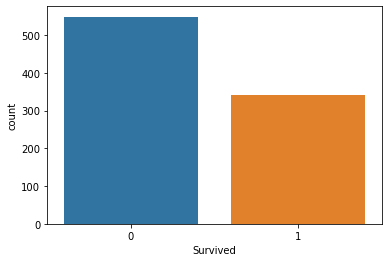

In [5]:
# Visualise how many survivors vs non-survivors exist in the training data
sns.countplot(x='Survived', data=titanic_data)

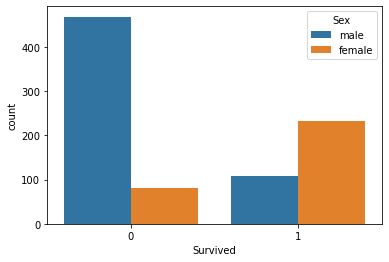

In [6]:
# Survival rates between genders
# Compare survival rates between the Male and Female values for Sex
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

As we can see, passengers with a Sex of Male were much more likely to be non-survivors than passengers with a Sex of Female

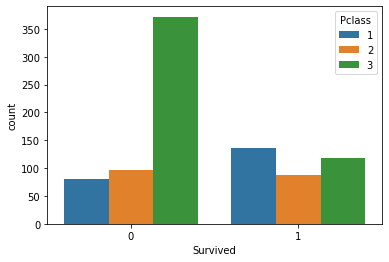

In [7]:
# Survival Rates Between Passenger Classes
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

Passengers with a Pclass value of 3 - which indicates the third class, which was the cheapest and least luxurious - were much more likely to die when the Titanic crashed.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

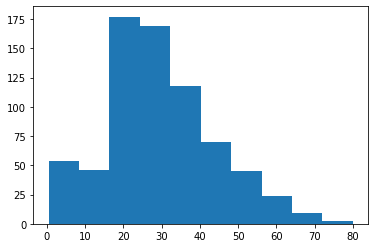

In [8]:
# The Age Distribution of Titanic Passengers
# A histogram
# Dropna removes the null values which is a necessary step
plt.hist(titanic_data['Age'].dropna())

There is a concentration of Titanic passengers with an Age value between 20 and 40

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

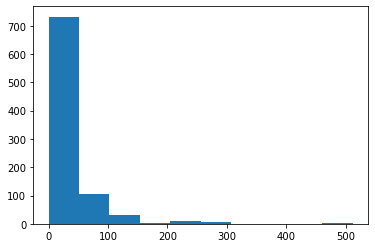

In [9]:
# The Ticket Price Distribution of Titanic Passengers
plt.hist(titanic_data['Fare'])

There are three distinct groups of Fare prices within the Titanic data set. This makes sense because there are also three unique values for the Pclass variable. The difference Fare groups correspond to the different Pclass categories.

In [10]:
# Removing Null Data From Our Data Set
# We first examine where our data set contains missing data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


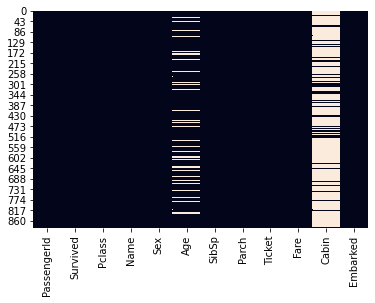

In [11]:
# Another way to create a quick visualization is by using a Heatmap
sns.heatmap(titanic_data.isnull(), cbar=False)

The white lines indicate the missing values in the dataset.
As we can see, Age & Cabin columns contains the missing data in the Titanic data set

Age column contains a small amount of missing data, so we can fill in the missing data with some form of mathematics.

Cabin data is missing enough data that we could probably remove it from our model entirely

The process of filling in missing data is called **imputation**.

In [ ]:
# We will fill in the missing Age values with the average Age value for the specific Pclass passenger class that the passenger belongs to.
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])